In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load dataset
data = pd.read_csv('/content/HR_Analytics.csv')

In [3]:
data.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [4]:
data.shape

(1480, 38)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,...,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,...,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,...,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
# Data preprocessing function
def preprocess_data(data):
    # Handle missing values
    data['YearsWithCurrManager'].fillna(data['YearsWithCurrManager'].median(), inplace=True)

    # Encode categorical variables
    categorical_cols = ['AgeGroup', 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
                        'JobRole', 'MaritalStatus', 'SalarySlab', 'OverTime']
    data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

    # Drop columns that are not useful for prediction
    data.drop(columns=['EmpID', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], inplace=True)

    return data

In [8]:
# Preprocess the data
data_preprocessed = preprocess_data(data)


In [31]:
#  ratio of people churned or not

churned_count = data_preprocessed[data_preprocessed['Attrition_Yes'] == 1].shape[0]
not_churned_count = data_preprocessed[data_preprocessed['Attrition_Yes'] == 0].shape[0]

churned_ratio = churned_count / data_preprocessed.shape[0] * 100
not_churned_ratio = not_churned_count / data_preprocessed.shape[0] * 100

print("Churned ratio:", churned_ratio)
print("Not churned ratio:", not_churned_ratio)


Churned ratio: 16.08108108108108
Not churned ratio: 83.91891891891892


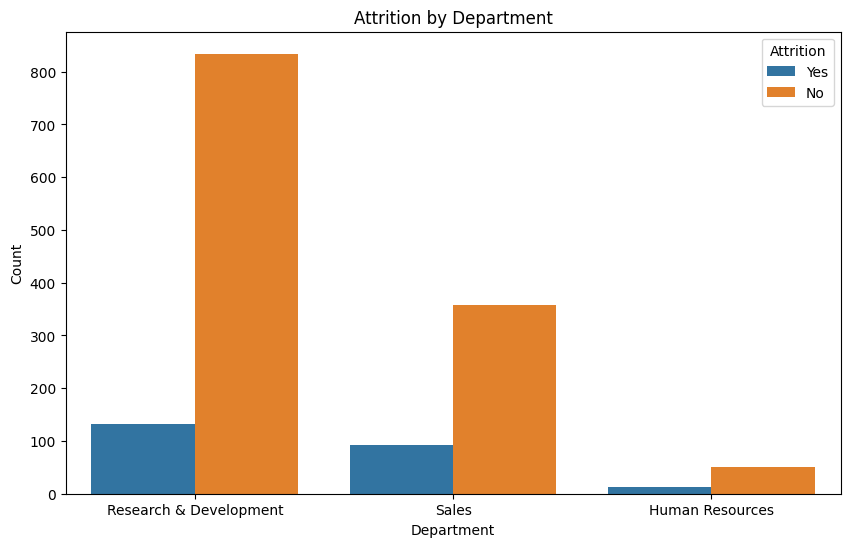

In [9]:
# Bar Plot: Attrition by Department
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

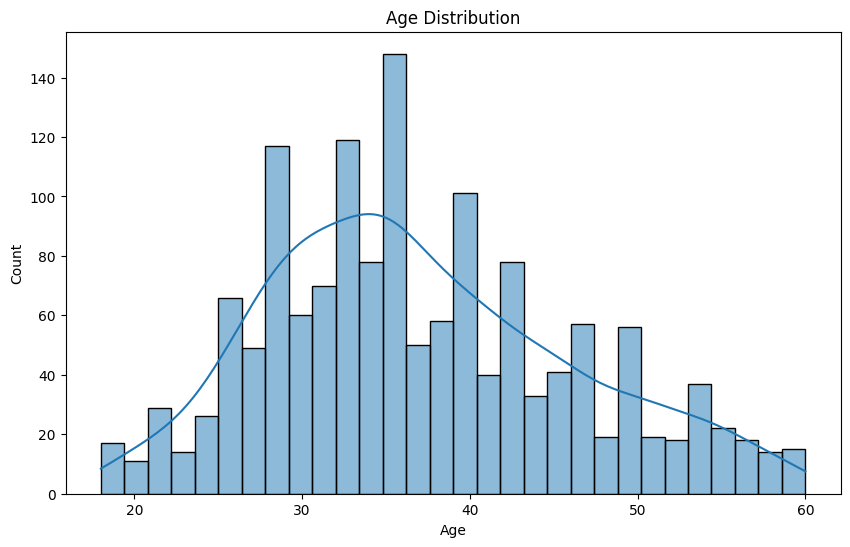

In [10]:
# Histogram: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

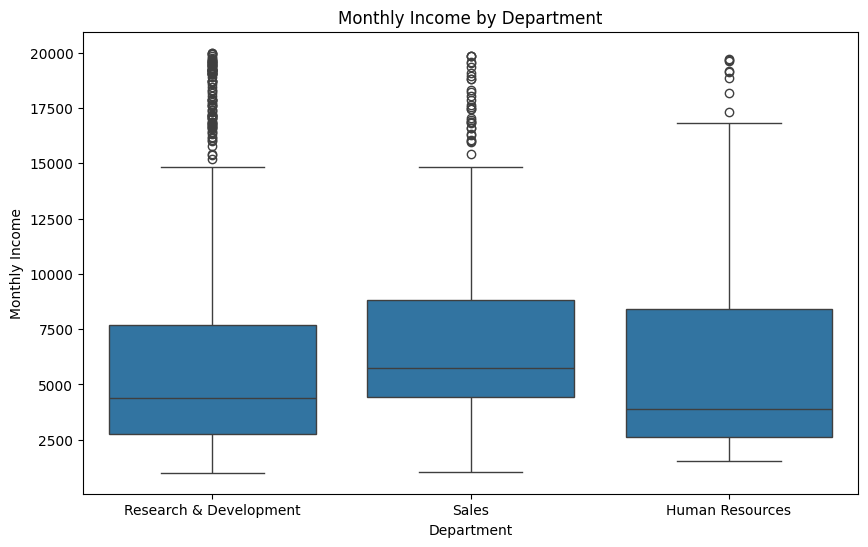

In [11]:
# Box Plot: Monthly Income by Department
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Department', y='MonthlyIncome')
plt.title('Monthly Income by Department')
plt.xlabel('Department')
plt.ylabel('Monthly Income')
plt.show()


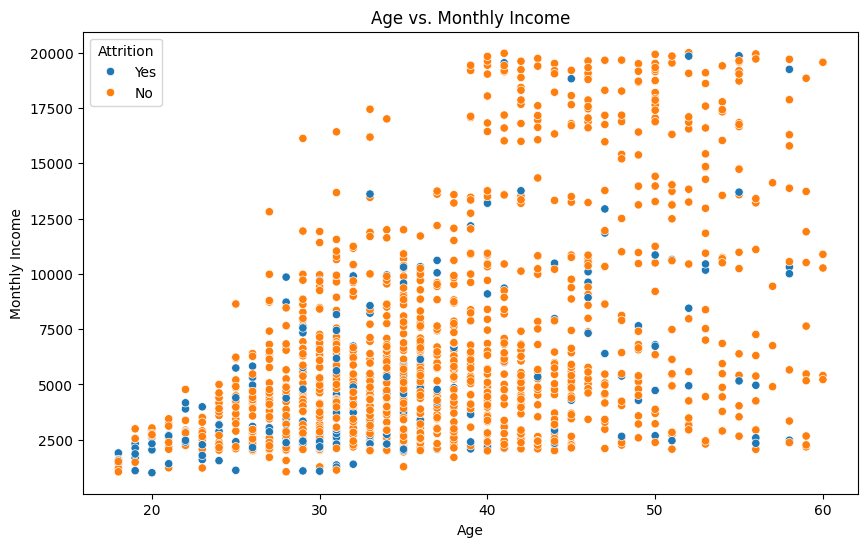

In [13]:
# Scatter Plot: Age vs. Monthly Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='MonthlyIncome', hue='Attrition')
plt.title('Age vs. Monthly Income')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.show()

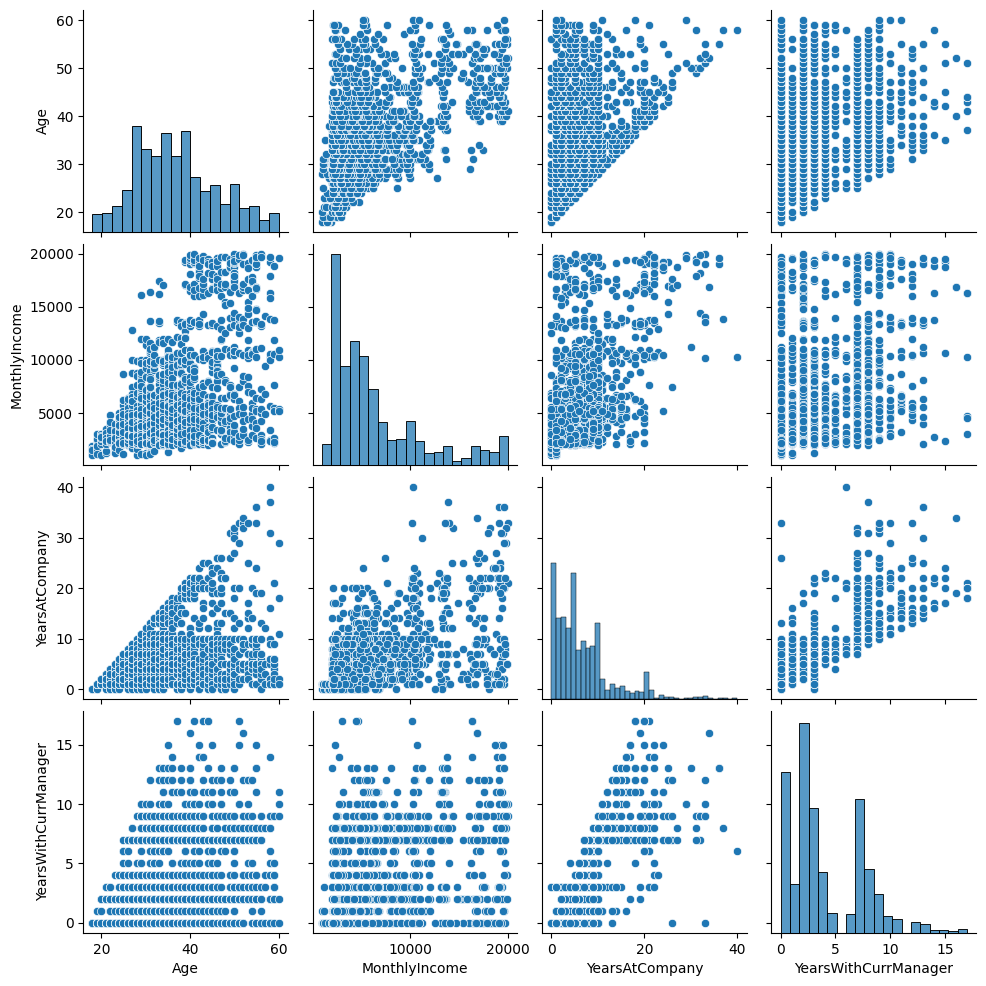

In [14]:
# Pair Plot: Relationships between continuous variables
sns.pairplot(data[['Age', 'MonthlyIncome', 'YearsAtCompany', 'YearsWithCurrManager']])
plt.show()

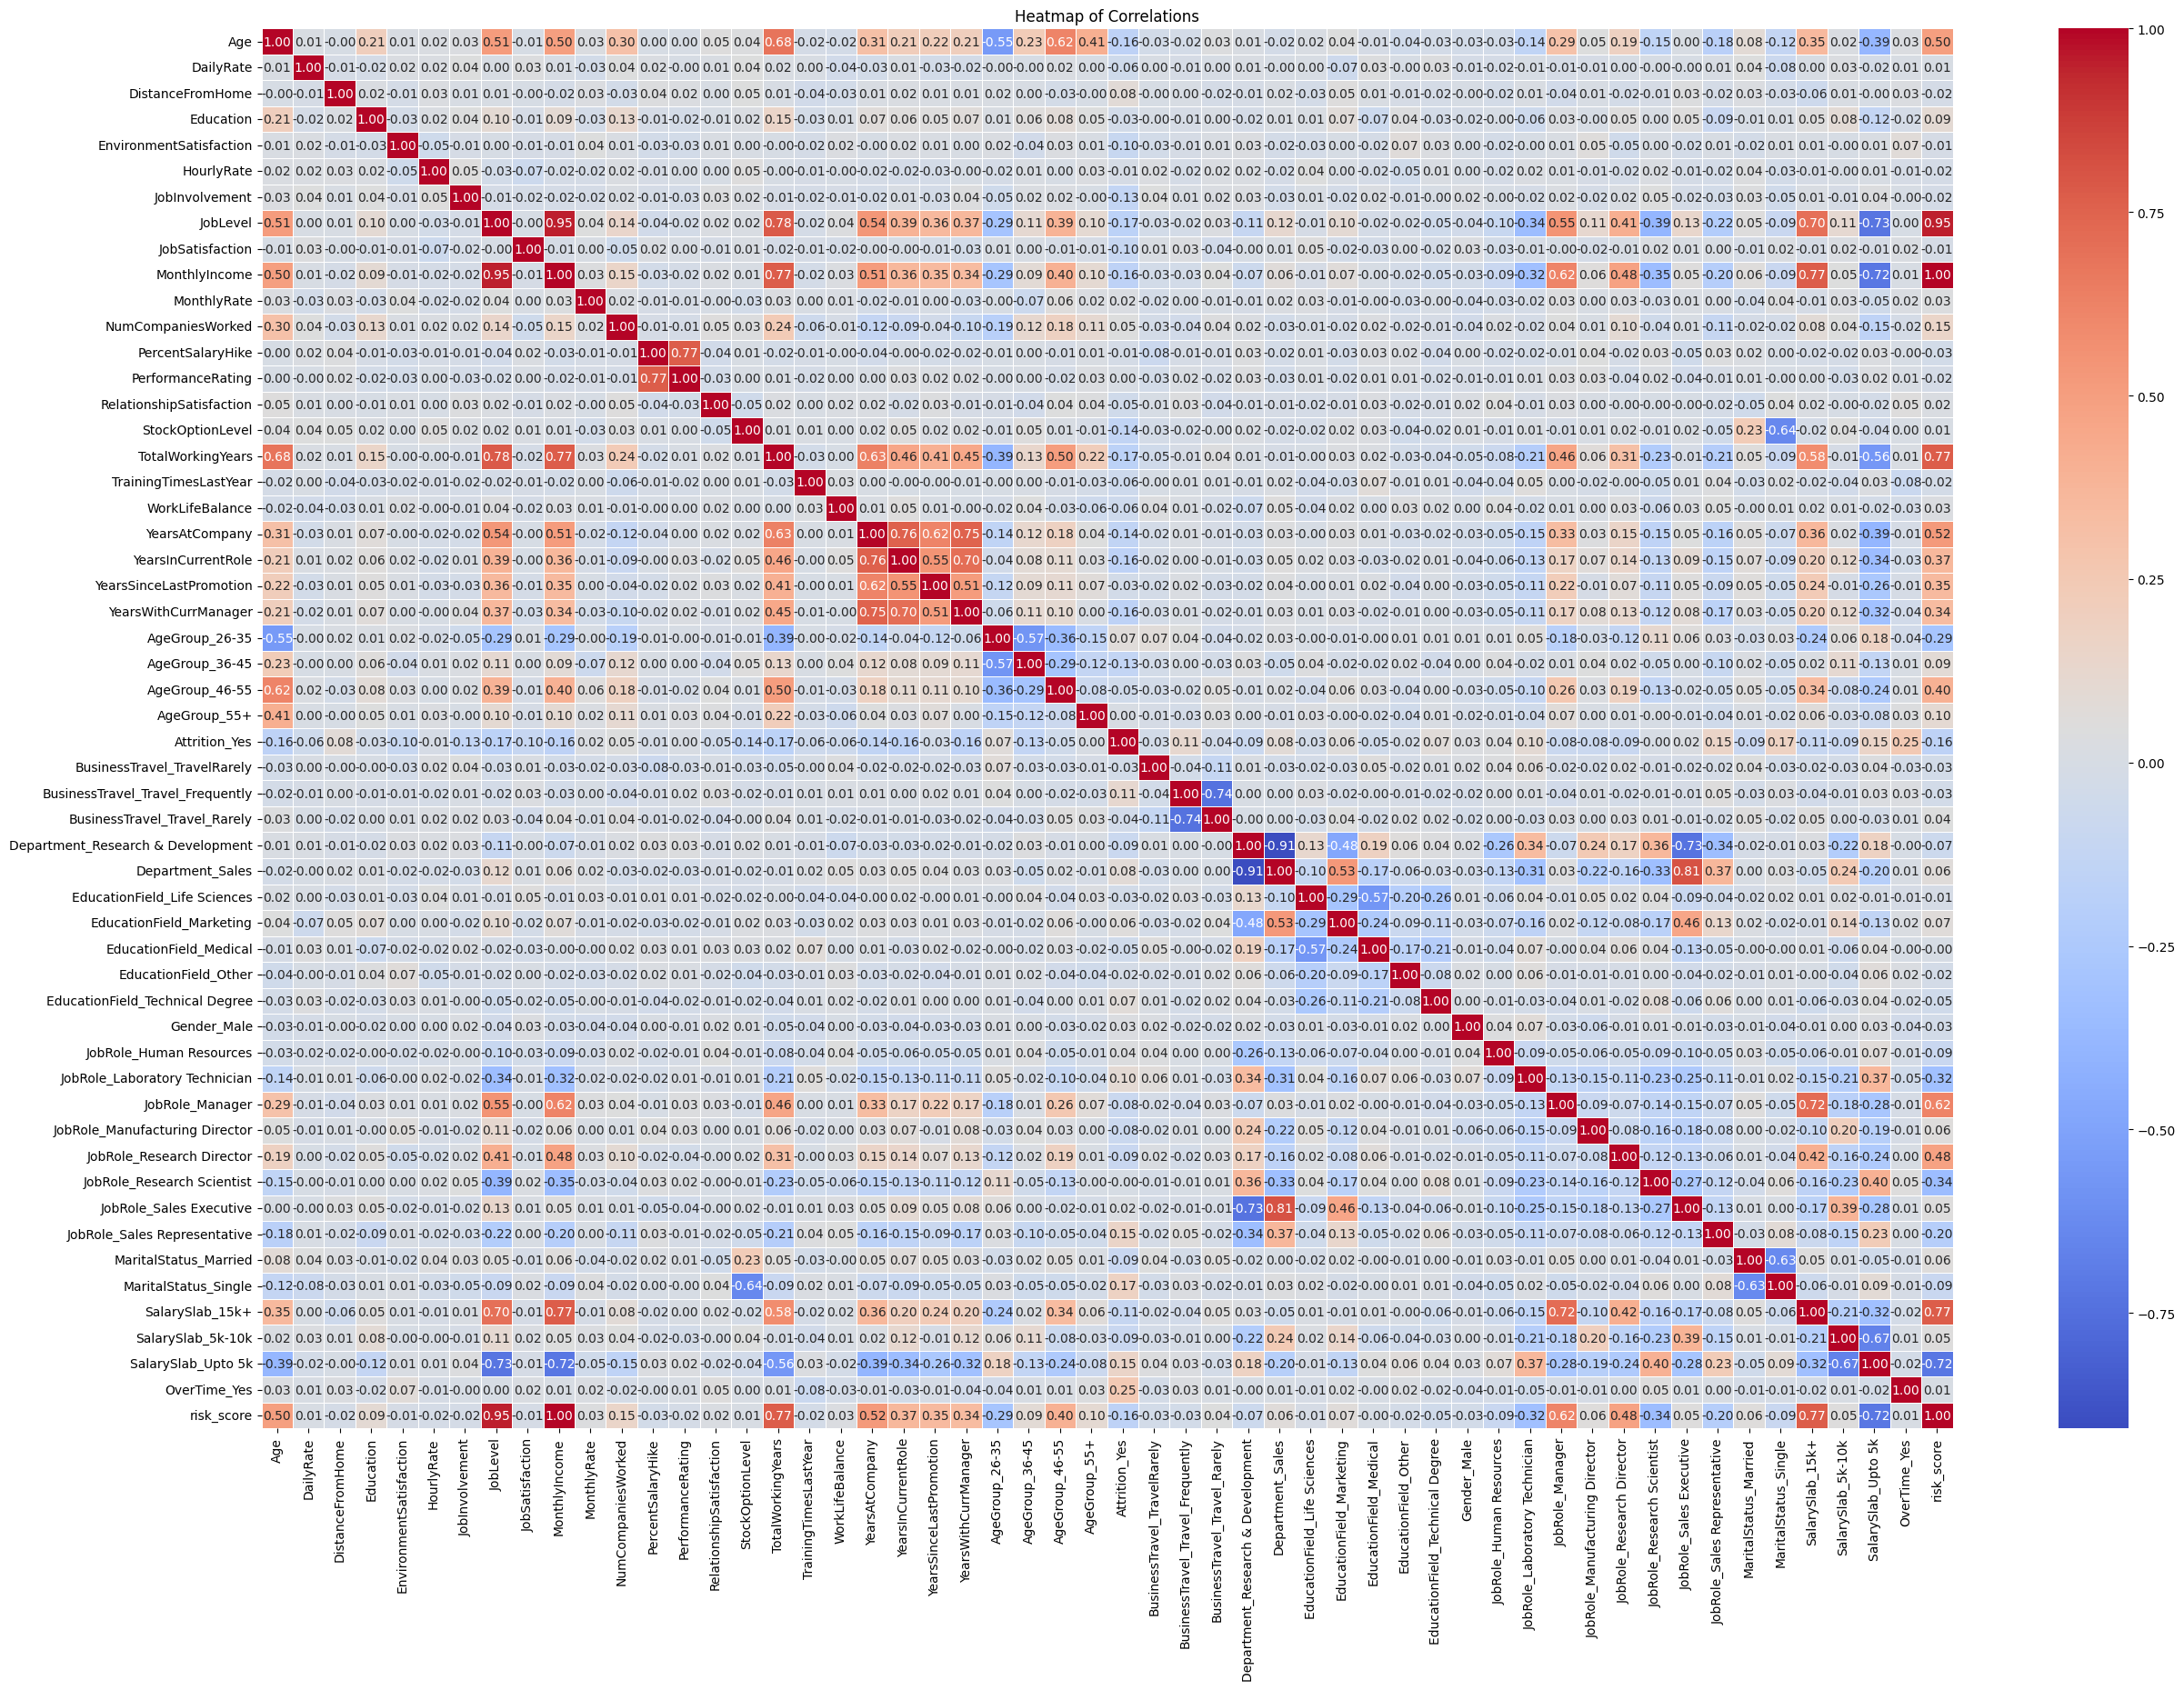

In [47]:
# Heatmap: Correlation Matrix
plt.figure(figsize=(30, 20))
correlation_matrix = data_preprocessed.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlations')
plt.show()

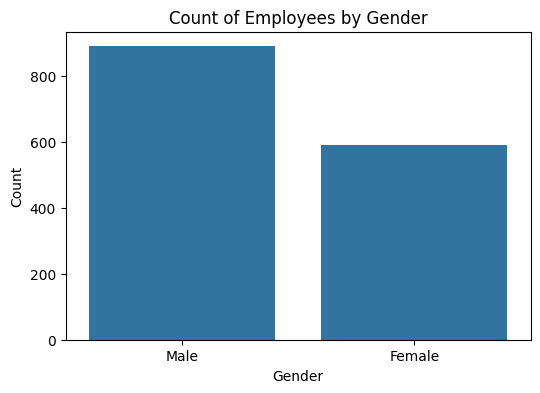

In [16]:
# Count Plot: Count of employees by Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender')
plt.title('Count of Employees by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

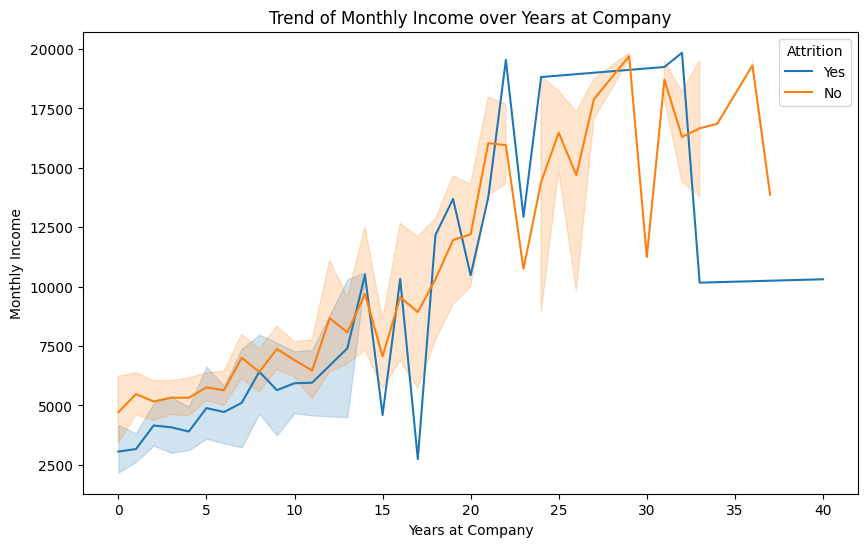

In [17]:
# Line Plot: Trend of average Monthly Income over Years at Company
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='YearsAtCompany', y='MonthlyIncome', hue='Attrition')
plt.title('Trend of Monthly Income over Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Monthly Income')
plt.show()

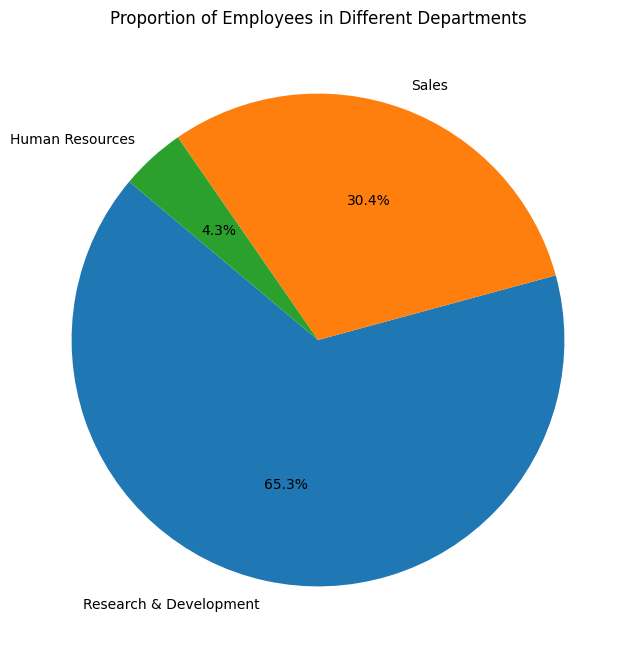

In [18]:
# Pie Chart: Proportion of employees in different Departments
department_counts = data['Department'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Employees in Different Departments')
plt.show()

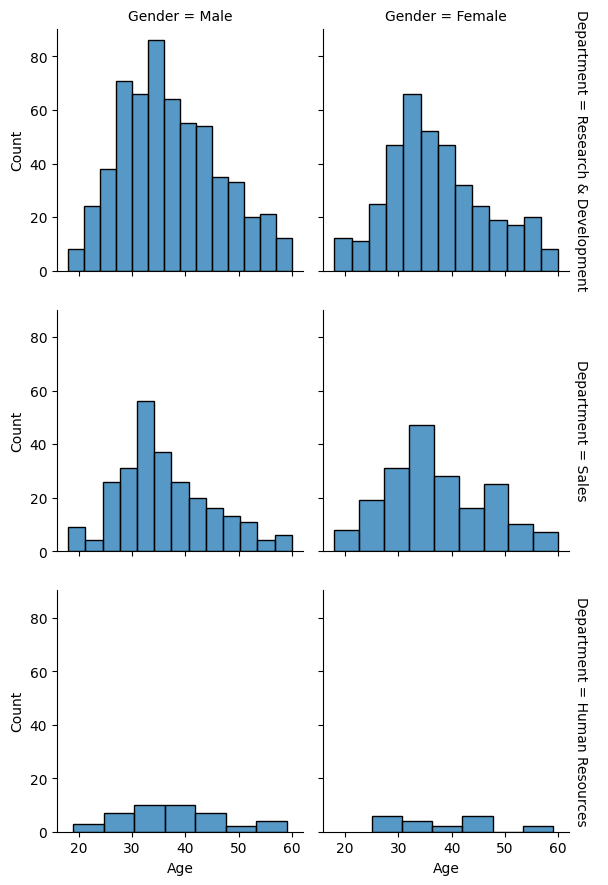

In [20]:
# Facet Grid: Age Distribution by Gender and Department
g = sns.FacetGrid(data, col='Gender', row='Department', margin_titles=True)
g.map(sns.histplot, 'Age')
g.add_legend()
plt.show()

In [36]:
# feature importance

importances = model.feature_importances_
features = X.columns

for i, feature in enumerate(features):
    print(f"{feature}: {importances[i]}")


Age: 0.053155957618686925
DailyRate: 0.052357103596605455
DistanceFromHome: 0.04748989400832239
Education: 0.021995959531119484
EnvironmentSatisfaction: 0.02597625737732069
HourlyRate: 0.04092381426476932
JobInvolvement: 0.024410349131462637
JobLevel: 0.022020101829613795
JobSatisfaction: 0.02777524655259155
MonthlyIncome: 0.06113396252551649
MonthlyRate: 0.04900913836909416
NumCompaniesWorked: 0.034271921531466736
PercentSalaryHike: 0.034602756013103995
PerformanceRating: 0.004349901583661656
RelationshipSatisfaction: 0.022948614527407027
StockOptionLevel: 0.02346362922215757
TotalWorkingYears: 0.03874827236237983
TrainingTimesLastYear: 0.02553586636450991
WorkLifeBalance: 0.021419676234534443
YearsAtCompany: 0.043760164974022034
YearsInCurrentRole: 0.02412484334260382
YearsSinceLastPromotion: 0.024586729761945415
YearsWithCurrManager: 0.03506535737606056
AgeGroup_26-35: 0.007526921388782327
AgeGroup_36-45: 0.007147847338467072
AgeGroup_46-55: 0.004645820290330884
AgeGroup_55+: 0.0018

<ipython-input-45-3fa7912f0f1a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=sorted_features, palette='coolwarm')


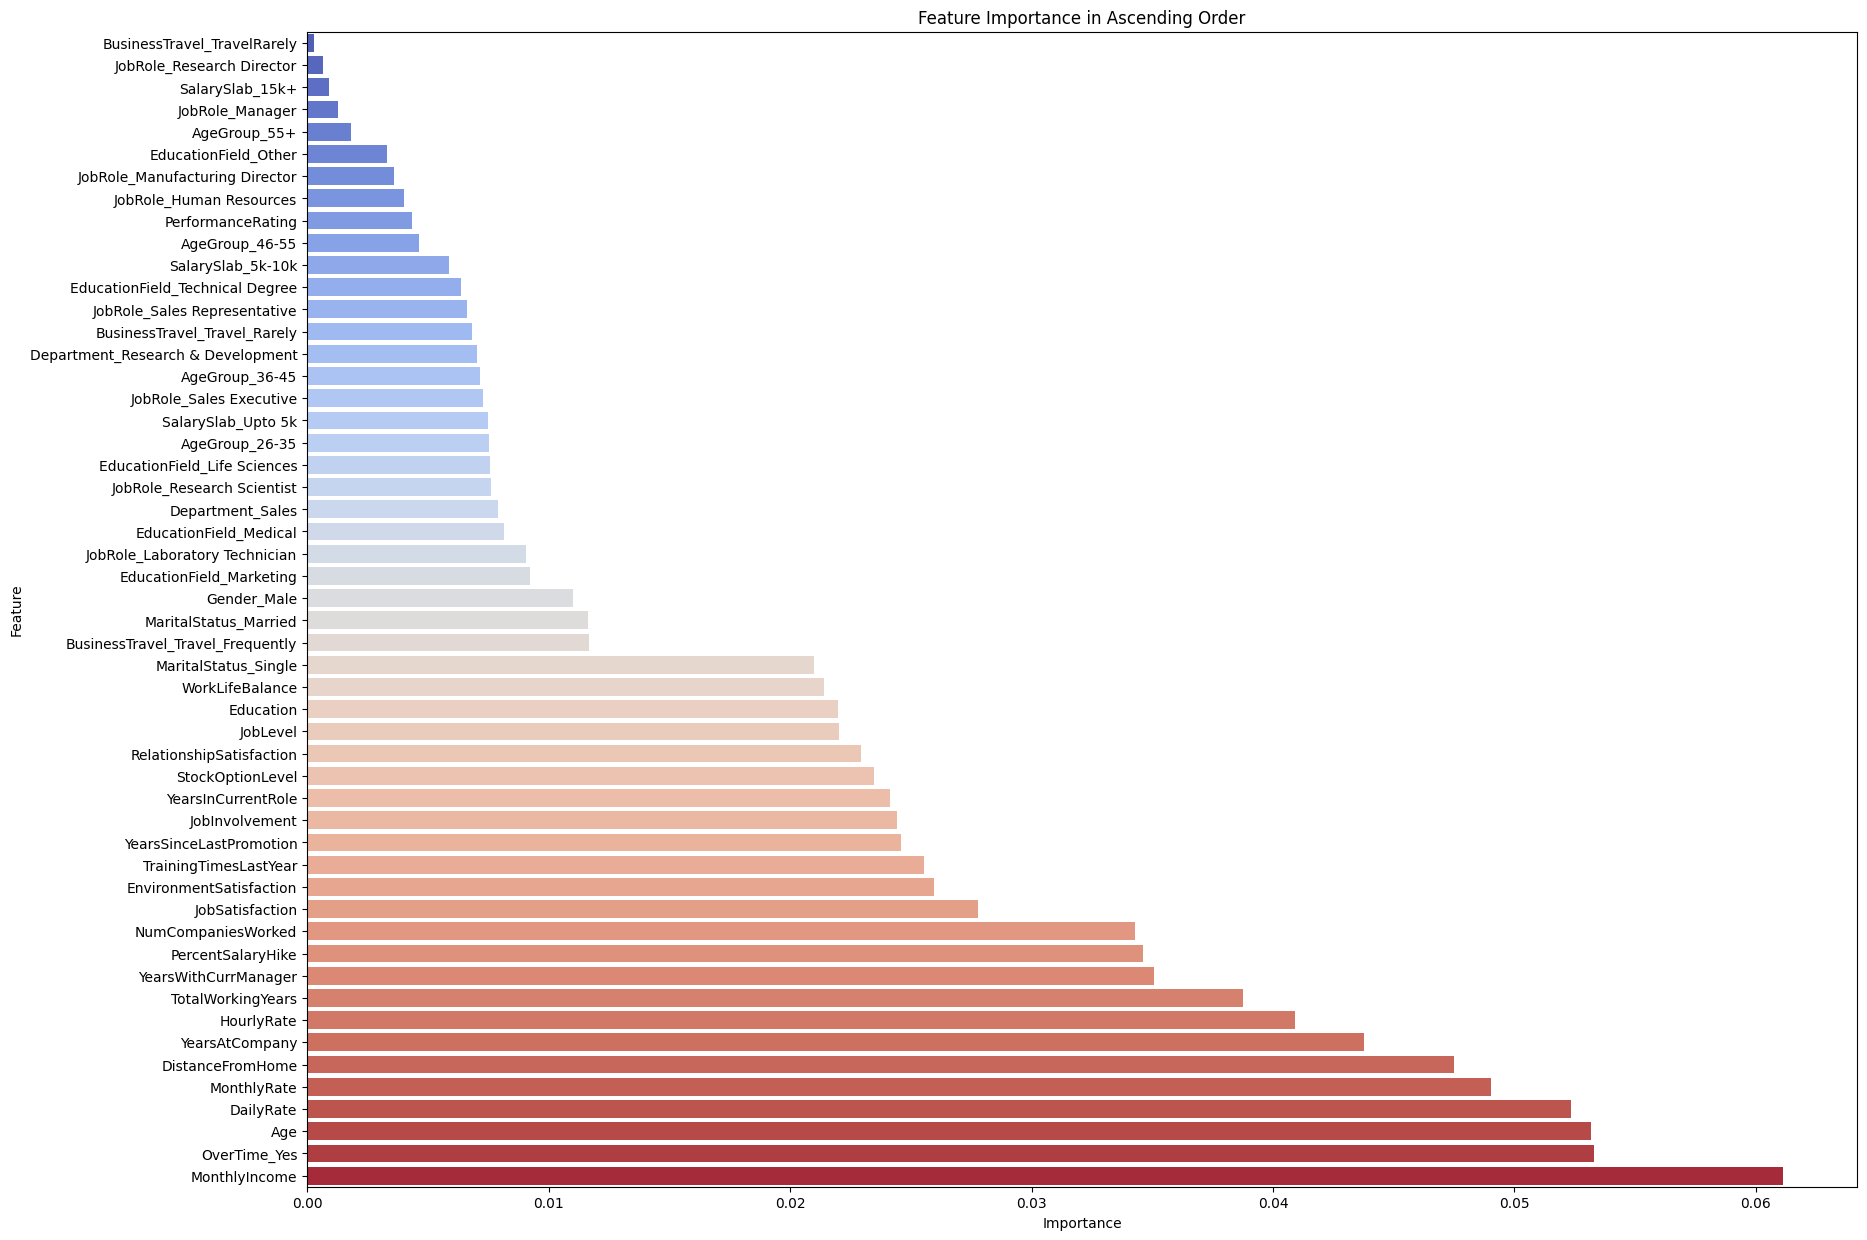

In [45]:
#  visualize feature importance in aseceding order

importances = model.feature_importances_
features = X.columns

# Sort features and importances in ascending order
sorted_indices = np.argsort(importances)
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = [importances[i] for i in sorted_indices]

# Create a bar plot
plt.figure(figsize=(20, 15))
sns.barplot(x=sorted_importances, y=sorted_features, palette='coolwarm')
plt.title('Feature Importance in Ascending Order')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [46]:
#  identify high-risk employees

def identify_high_risk_employees(data):
  # Calculate risk score based on selected features
  data['risk_score'] = (data['Age'] * 0.1) + (data['MonthlyIncome'] * 0.2) + (data['YearsAtCompany'] * 0.3) + (data['YearsWithCurrManager'] * 0.4)

  # Set a threshold for high-risk employees
  threshold = data['risk_score'].mean() + data['risk_score'].std()

  # Select employees with risk score above the threshold
  high_risk_employees = data[data['risk_score'] > threshold]

  return high_risk_employees

# Identify high-risk employees
high_risk_employees = identify_high_risk_employees(data_preprocessed)

# Print the number of high-risk employees
print(f"Number of high-risk employees: {high_risk_employees.shape[0]}")

# Print a sample of high-risk employees
print(high_risk_employees.head())


Number of high-risk employees: 213
     Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
185   27        269                 5          1                        3   
277   29        986                 3          4                        2   
299   29        694                 1          3                        4   
364   30        153                 8          2                        2   
373   30        634                17          4                        2   

     HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
185          42               2         3                4          12808   
277          93               2         3                3          11935   
299          87               2         4                4          16124   
364          73               4         3                1          11416   
373          95               3         3                1          11916   

     ...  JobRole_Research Scientist  J

In [22]:
# Separate features and target
X = data_preprocessed.drop(columns=['Attrition_Yes'])
y = data_preprocessed['Attrition_Yes']


In [23]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [25]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Make predictions
y_pred = model.predict(X_test)

In [27]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[371   2]
 [ 61  10]]

Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.99      0.92       373
        True       0.83      0.14      0.24        71

    accuracy                           0.86       444
   macro avg       0.85      0.57      0.58       444
weighted avg       0.85      0.86      0.81       444


Accuracy Score: 0.8581081081081081
